In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('marketing_data.csv')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
print(df.MntWines.mean())

303.9357142857143


In [10]:
print(df.MntGoldProds.mean())

44.021875


In [11]:
print(df.MntWines.median())
print(df.MntWines.mean())
print(df.MntWines.max())
print(df.MntWines.min())


173.5
303.9357142857143
1493
0


In [12]:
print(df.MntWines.std())

336.5973926053718


In [ ]:
print(stats.iqr(df.MntWines))
print("value of Q1 ",np.percentile(df.MntWines, 25))
print("value of Q3 ",np.percentile(df.MntWines, 75))

480.5
value of Q1  23.75
value of Q3  504.25


<Axes: >

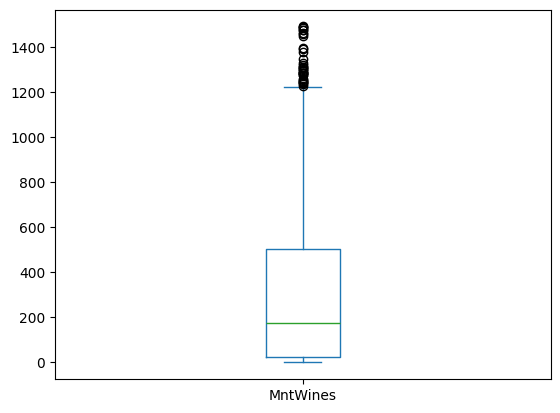

In [14]:
df.MntWines.plot.box()

<Axes: ylabel='Frequency'>

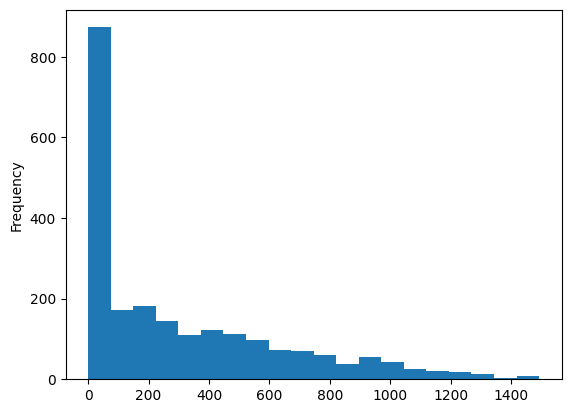

In [15]:
df.MntWines.plot.hist(bins=20)

In [25]:
def clean_income(x):
    if isinstance(x, str):
        return float(x[1:].replace(",", "").replace(" ", ""))

In [26]:
df[' Income '] = df[' Income '].map(lambda x: clean_income(x))

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


<Axes: >

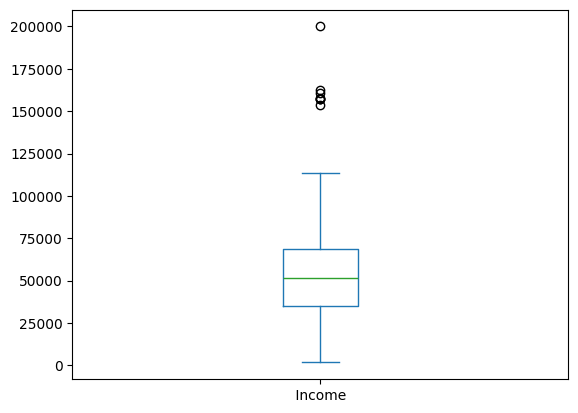

In [33]:
df[' Income '].plot.box()

##### Here we did an outliar management

In [32]:
df[' Income ']=np.where(df[' Income '] > 200000, 200000, df[' Income '])

<Axes: >

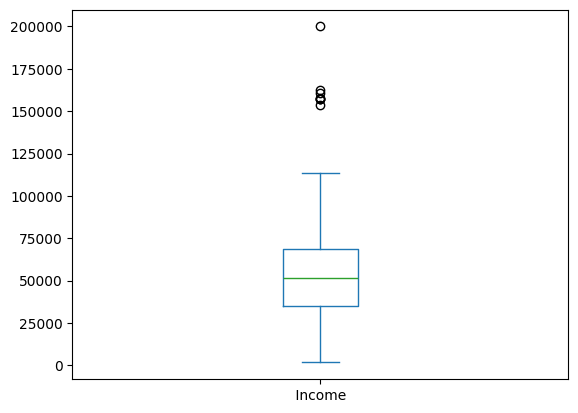

In [34]:
df[' Income '].plot.box()

<Axes: xlabel='Education'>

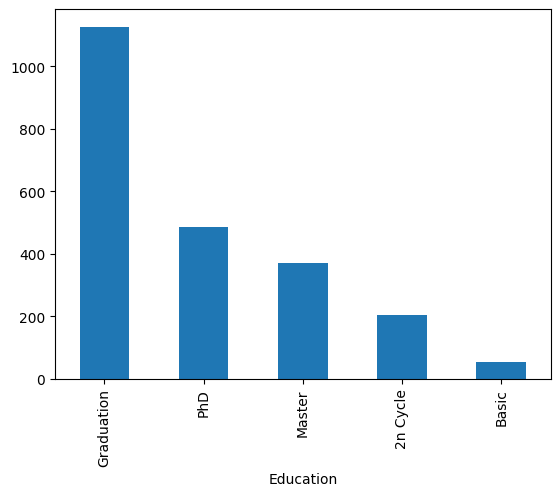

In [36]:
df.Education.value_counts().plot.bar()

In [37]:
df.Education.value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

<Axes: xlabel=' Income ', ylabel='MntWines'>

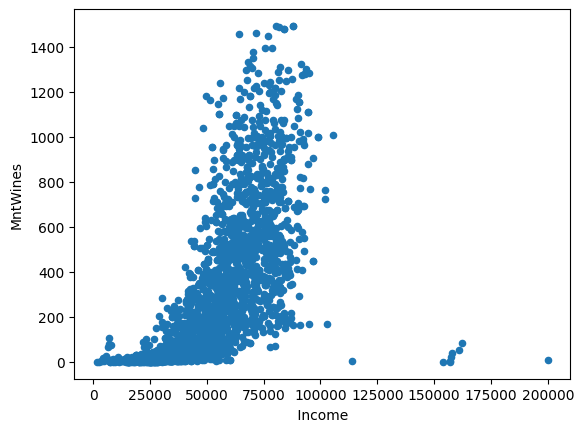

In [42]:
df.plot.scatter(' Income ', 'MntWines',)

Income     Axes(0.125,0.11;0.775x0.77)
dtype: object

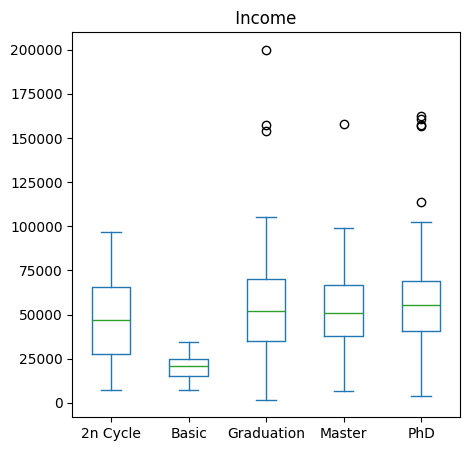

In [44]:
df.plot.box(column=' Income ', by='Education', figsize=(5, 5))